In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_employee_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IBM Attrition Data.csv")
data_employee = data_employee_dataset.copy()
data_employee.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
data_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [5]:
print(data_employee.isnull().sum())

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64


**Find the age distribution of employees in IBM**

In [6]:
data_employee.value_counts("Age")

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
dtype: int64

In [7]:
def Age(data_employee):
    data_employee.loc[data_employee['Age'] <= 30,'Age'] = 1
    data_employee.loc[(data_employee['Age'] > 30) & (data_employee['Age'] <= 40), 'Age'] = 2
    data_employee.loc[(data_employee['Age'] > 40) & (data_employee['Age'] <= 50), 'Age'] = 3
    data_employee.loc[(data_employee['Age'] > 50) & (data_employee['Age'] <= 60), 'Age'] = 4
    return data_employee

Age(data_employee); 

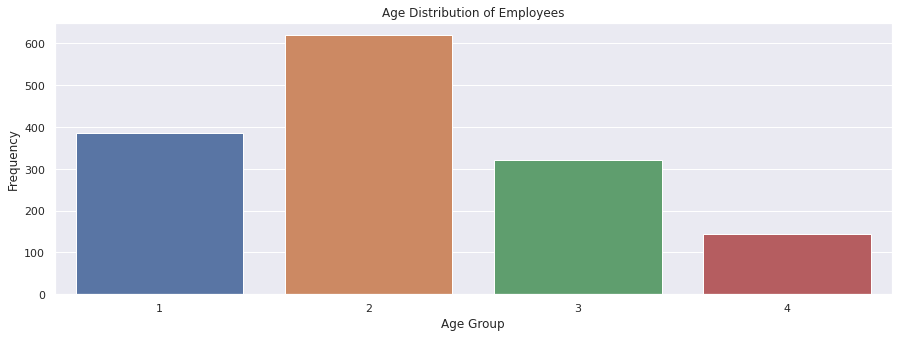

In [10]:
#data_employee.value_counts("Age").plot(kind='bar',figsize=(15,5),title="Age Distribution of Employees")
plt.figure(figsize=(15,5))
agedist = sns.countplot(x=data_employee['Age'])
plt.title("Age Distribution of Employees")
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.show()

**Explore attrition by age**

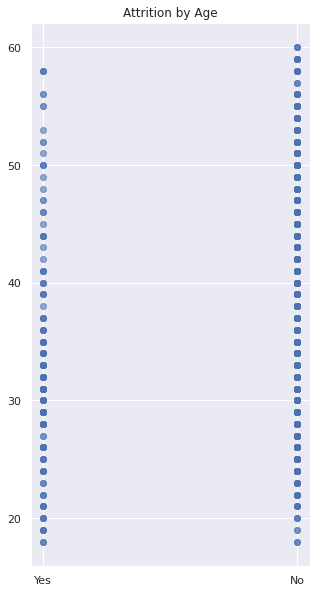

In [11]:
plt.figure(figsize=(5,10))
plt.scatter(data_employee_dataset.Attrition, data_employee_dataset.Age, alpha=.35)
plt.title("Attrition by Age")
plt.show()

**Explore data for Left employees**

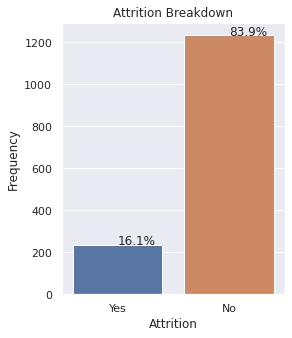

In [12]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x=data_employee['Attrition'])
plt.title("Attrition Breakdown")
plt.xlabel('Attrition')
plt.ylabel('Frequency')
total = len(data_employee['Attrition'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width()/2
  y = p.get_y() + p.get_height() + 0.02
  ax.annotate(percentage, (x,y))
plt.show()

**Find out the distribution of employees by the education field**

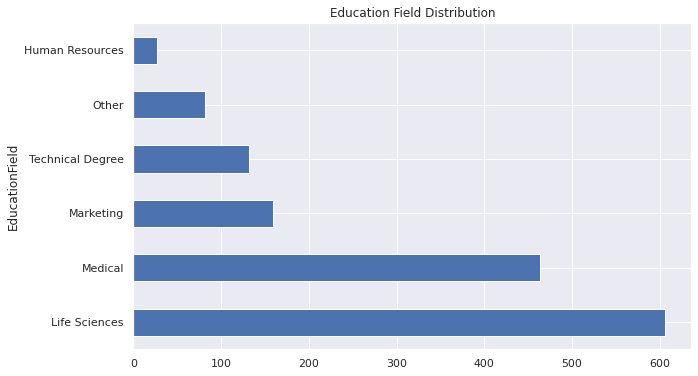

In [13]:
data_employee.value_counts("EducationField").plot(kind='barh',figsize=(10,6),title="Education Field Distribution")
plt.show()

**Give a bar chart for the number of married and unmarried employees**

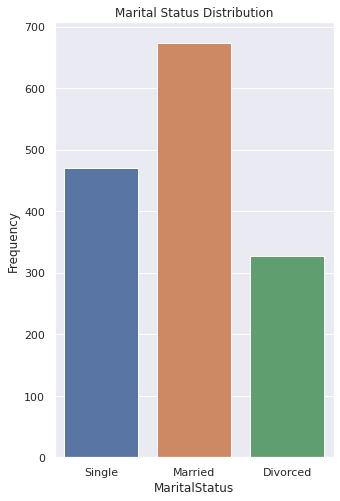

In [14]:
plt.figure(figsize=(5,8))
maritalstat = sns.countplot(x=data_employee['MaritalStatus'])
plt.title("Marital Status Distribution")
plt.ylabel("Frequency")
plt.show()

In [15]:
data_employee['Attrition'].replace('Yes',1, inplace=True)
data_employee['Attrition'].replace('No',0, inplace=True)
data_employee['EducationField'].replace('Life Sciences',1, inplace=True)
data_employee['EducationField'].replace('Medical',2, inplace=True)
data_employee['EducationField'].replace('Marketing', 3, inplace=True)
data_employee['EducationField'].replace('Other',4, inplace=True)
data_employee['EducationField'].replace('Technical Degree',5, inplace=True)
data_employee['EducationField'].replace('Human Resources', 6, inplace=True)
data_employee['Department'].replace('Research & Development',1, inplace=True)
data_employee['Department'].replace('Sales',2, inplace=True)
data_employee['Department'].replace('Human Resources', 3, inplace=True)
data_employee['MaritalStatus'].replace('Married',1, inplace=True)
data_employee['MaritalStatus'].replace('Single',2, inplace=True)
data_employee['MaritalStatus'].replace('Divorced',3, inplace=True)
data_employee.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,3,1,2,1,2,1,2,4,2,5993,8,1,6
1,3,0,1,8,1,1,3,2,1,5130,1,3,10
2,2,1,1,2,2,4,4,3,2,2090,6,3,0
3,2,0,1,3,4,1,4,3,1,2909,1,3,8
4,1,0,1,2,1,2,1,2,1,3468,9,3,2


In [16]:
data_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   Attrition                1470 non-null   int64
 2   Department               1470 non-null   int64
 3   DistanceFromHome         1470 non-null   int64
 4   Education                1470 non-null   int64
 5   EducationField           1470 non-null   int64
 6   EnvironmentSatisfaction  1470 non-null   int64
 7   JobSatisfaction          1470 non-null   int64
 8   MaritalStatus            1470 non-null   int64
 9   MonthlyIncome            1470 non-null   int64
 10  NumCompaniesWorked       1470 non-null   int64
 11  WorkLifeBalance          1470 non-null   int64
 12  YearsAtCompany           1470 non-null   int64
dtypes: int64(13)
memory usage: 149.4 KB


In [17]:
y = data_employee['Attrition'] #dependent variabel
x = data_employee.drop('Attrition', axis = 1) #independent variabel

In [18]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(294, 12)
(294,)
(1176, 12)
(1176,)


In [20]:
x

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,3,2,1,2,1,2,4,2,5993,8,1,6
1,3,1,8,1,1,3,2,1,5130,1,3,10
2,2,1,2,2,4,4,3,2,2090,6,3,0
3,2,1,3,4,1,4,3,1,2909,1,3,8
4,1,1,2,1,2,1,2,1,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,1,23,2,2,3,4,1,2571,4,3,5
1466,2,1,6,1,2,4,1,1,9991,4,3,7
1467,1,1,4,3,1,2,2,1,6142,1,3,6
1468,3,2,2,3,2,4,2,1,5390,2,2,9


In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
lr.score(x_train,y_train)
y_pred = lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8367346938775511
[[244   1]
 [ 47   2]]


In [25]:
prob = lr.predict_proba(x_test)
x_test['At Rate'] = prob[:,1]

In [26]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
x_test.sort_values(by='At Rate', ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,At Rate
748,1,2,29,2,2,2,1,2,4969,8,3,2,0.605042
717,1,1,16,4,5,3,2,1,2811,9,3,2,0.594065
204,2,1,29,1,2,2,1,1,6673,7,3,1,0.507249
4,1,1,2,1,2,1,2,1,3468,9,3,2,0.492170
1114,3,1,15,4,4,3,1,1,2367,8,2,8,0.486917
536,4,2,16,4,3,1,1,2,5405,8,3,2,0.468988
1411,1,3,2,3,6,3,2,1,2187,4,3,2,0.431104
54,1,2,23,3,3,3,4,1,4157,7,2,2,0.416221
1263,3,1,12,3,2,2,2,3,2766,8,2,5,0.400315
483,2,1,25,2,4,1,4,2,3681,4,3,3,0.397596


In [27]:
x_test.to_csv("Hasil_Prediksi_Latihan.csv", index=False)